# Quant

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\Chinmay\Python\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
ticker = 'MCD'
start = '2010-01-01'
end = '2014-01-01'

data = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,62.630001,63.07,62.310001,62.779999,44.199623,5839300
2010-01-05,62.660000,62.75,62.189999,62.299999,43.861694,7099000
2010-01-06,62.200001,62.41,61.060001,61.450001,43.263245,10551300
2010-01-07,61.250000,62.34,61.110001,61.900002,43.580074,7517700
2010-01-08,62.270000,62.41,61.599998,61.840000,43.537853,6107300


In [4]:
## Computing  net returns

data['Ret'] = (data['Adj Close'] - data['Adj Close'].shift(-1))/data['Adj Close'].shift(-1)

In [5]:
## Computing log returns

data['logRet'] = (np.log(data['Adj Close']) - (np.log(data['Adj Close'].shift(-1))))

In [6]:
df = data[['Adj Close', 'Ret', 'logRet']]
df.head()

,Adj Close,Ret,logRet
Date,,,
2010-01-04,44.199623,0.007704,0.007675
2010-01-05,43.861694,0.013833,0.013738
2010-01-06,43.263245,-0.007270,-0.007297
2010-01-07,43.580074,0.000970,0.000969
2010-01-08,43.537853,-0.007701,-0.007731


In [7]:
import seaborn as sns
sns.set(style='whitegrid')

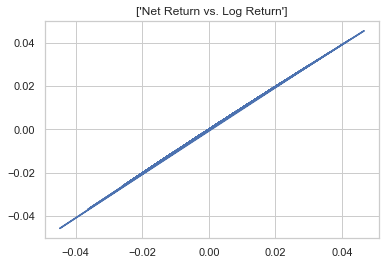

In [9]:
plt.plot(df['Ret'], df['logRet'])
plt.title(['Net Return vs. Log Return'])
plt.show()

### This supports the assumption that if Returns are smaller, log of the returns are also on the same scale

### Problem 13: Computing Mean and Std. Dev

In [10]:
df['R_Mean'] = np.mean(df['Ret'])
df['lR_Mean'] = np.mean(df['logRet'])

<ipython-input-10-b8a7522bd43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R_Mean'] = np.mean(df['Ret'])
<ipython-input-10-b8a7522bd43d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lR_Mean'] = np.mean(df['logRet'])


In [11]:
### Calculating std deviation

df['std_Ret'] = np.std(df['Ret'])
df['std_logRet'] =np.std(df['logRet'])

<ipython-input-11-578caa13a42a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std_Ret'] = np.std(df['Ret'])
<ipython-input-11-578caa13a42a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std_logRet'] =np.std(df['logRet'])


In [12]:
df.head()

,Adj Close,Ret,logRet,R_Mean,lR_Mean,std_Ret,std_logRet
Date,,,,,,,
2010-01-04,44.199623,0.007704,0.007675,-0.000516,-0.000558,0.009214,0.009208
2010-01-05,43.861694,0.013833,0.013738,-0.000516,-0.000558,0.009214,0.009208
2010-01-06,43.263245,-0.007270,-0.007297,-0.000516,-0.000558,0.009214,0.009208
2010-01-07,43.580074,0.000970,0.000969,-0.000516,-0.000558,0.009214,0.009208
2010-01-08,43.537853,-0.007701,-0.007731,-0.000516,-0.000558,0.009214,0.009208


## Problem 14: Performing t-test

### Null hypothesis: Both the means are same
### Alternative: Both means are not same

In [13]:
from scipy.stats import ttest_ind

result_ttest = ttest_ind(df['R_Mean'], df['lR_Mean'])
print(result_ttest)

Ttest_indResult(statistic=6222375067436867.0, pvalue=0.0)


In [14]:
### Considering unequal variance

result2 = ttest_ind(df['R_Mean'], df['lR_Mean'])
print(result2)

Ttest_indResult(statistic=6222375067436867.0, pvalue=0.0)


### Since the t-statistic is too large at 5% confidence level, we can confirm that both means are not that similar and differ vastly.

## Problem 16

In [18]:
### Calculating moments

from scipy.stats import moment

mean_moment1 = moment(df['Ret'], moment=1)
mean_moment2 = moment(df['Ret'], moment=2)

lr_mean_moment1 = moment(df['logRet'], moment=1)
lr_mean_moment2 = moment(df['logRet'], moment=2)

In [19]:
print(mean_moment1)
print(mean_moment2)
print(lr_mean_moment1)
print(lr_mean_moment2)

0.0
nan
0.0
nan


In [20]:
### Comparing with numpy calculations only for log returns

log_mean = np.mean(df['logRet'])
log_std = np.std(df['logRet'])

In [21]:
print(log_mean)
print(log_std)

-0.0005582323722803213
0.009208331968291772


C:\Users\Chinmay\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


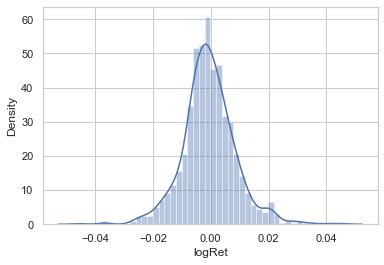

In [16]:
sns.distplot(df['logRet'])
plt.show()

#### Simulating the strategy: Get paid $100 everytime stock goes below $85 over the next 20 days

In [33]:
n_iter = 1000
below = np.zeros(1000)
np.random.seed(1998)

for i in range(n_iter):
    r = np.random.normal(log_mean/253, log_std/(253**0.5), 20)
    logPrice = np.log(1e3) + np.cumsum(r)
    min_log = np.min(logPrice)
    if min_log<85:
        below[i] = min_log
    

In [35]:
print(np.mean(below))

6.90596302581461
